# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [20]:
# In this code block I will import the necessary packages and specify the paths to relevant folders

# Installing the necessary packages
!pip install matplotlib
!pip install pandas
!pip install -r ../requirements.txt

# Importing necessary packages
import pandas as pd
import os
from rdkit import Chem
import sys
import matplotlib.pyplot as plt

# Specifying the paths to relevant folders
data_folder = '/data/'
model_folder = 'models/eos4tcc/'
output_directory = "../data"


  Using cached standardiser-0.1.9.tar.gz (698 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 392.1 kB/s eta 0:00:001m394.3 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 264.2 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 247.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 262.8 kB/s eta 0:00:00m eta 0:00:010:00:04
  Created wheel for standardiser: filename=standardiser-0.1.9-py3-none-any.whl size=720100 sha256=664f69e67f5c96c159a1da8cb8b6d7bfac2fffa85ee895445edfbb7da7b1f377
  Stored in directory: /home/thembo/.cache/pip/wheels/0c/11/ca/c0287d86f4b6b7e5e49235a22e58cc2fc5afaccd89cf17a16c
Successfully built standardiser


In [15]:
# In this code block I will load the data from the /data folder to a Pandas dataframe and understand which headers it has

# Define the path to the CSV file using the relative path

csv_file_path = os.path.join("..", "data", "reference_library.csv")

# Loading the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

#validate if the CSV contains standard and non-standard SMILES

# Define a function to validate SMILES strings
def is_standard_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    standardized_smiles = Chem.MolToSmiles(mol)
    return smiles == standardized_smiles

# Apply the function to each SMILES string in the DataFrame
df['is_standard_smiles'] = df['smiles'].apply(is_standard_smiles)

# Count the number of non-standard SMILES
non_standard_count = df['is_standard_smiles'].value_counts().get(False, 0)
print(f"Number of non-standard SMILES: {non_standard_count}")

# Display the DataFrame
print(df.head())

# Displaying the headers (column names) of the DataFrame
print("Column Headers:")
print(df.columns)



Number of non-standard SMILES: 959
                                              smiles  is_standard_smiles
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1               False
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1               False
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl               False
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...               False
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...               False
Column Headers:
Index(['smiles', 'is_standard_smiles'], dtype='object')


In [29]:
# In this code block I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

sys.path.append('../src')
from processing import standardise_smiles

# Get the SMILES column from the DataFrame and convert it to a list
smiles_list = df['smiles'].tolist()

# Check the first few elements of the list
#print(smiles_list[:1000])

# Standardise the list/ref library
standardised_smiles_list = standardise_smiles(smiles_list)

print(standardised_smiles_list)

# Update the DataFrame with the standardized SMILES
df['standardised_smiles'] = standardised_smiles_list

# Save the updated DataFrame to a new CSV file
df.to_csv(os.path.join(output_directory, "molecule_standardized.csv"), index=False)



[00:28:35] Can't kekulize mol.  Unkekulized atoms: 3 7


['CCCCNC(=S)N/N=C/c1sccc1C', 'Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1', 'O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl', 'O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1', 'CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1', 'Cn1c(=O)c2c(nc(N3CCC[C@@H](N)C3)n2Cc2cc(F)ccc2Cl)c2ccc(C(=O)O)cc21', 'CNC(=O)c1cccc2c1nc(-c1ccccc1O)n2Cc1ccccc1', 'C[C@]12CCC3C(CC[C@@H]4C[C@@H](S)CC[C@]34C)C1=CC[C@@H]2C1=CC(=O)OC1', 'CC1=C(C(=O)OCc2ccccc2)C(c2ccc(-c3ccccc3C)cc2)NC(=S)N1CCCCCc1nnn[nH]1', 'CC(C)Cc1cc(C(=O)NCc2cccnc2)no1', 'COC(=O)CC1NN=C2N(CCN2c2ccc(Cl)cc2)C1=O', 'CCN1c2ncc(COc3cccc(C(=O)O)c3)cc2C(=O)N(C)c2ccc(Cl)nc21', 'Cc1c(NC(=S)N/N=C\\c2ccccc2O)c(=O)n(-c2ccccc2)n1C', 'C[C@@H](O)c1nc(-c2nc(-c3nc(CO)cs3)cs2)cs1', 'CCCCCCCCCCCC(=O)CCCC', 'C=Cc1c(N)ncnc1N1CCC(c2nc(-c3ccc(C(F)(F)F)c(F)c3)cn2CCN2CCCC2)CC1', 'O=C1/C(=N/c2ccc(O)cc2)C(Cl)C(=O)c2ccccc21', 'O=C(O)CC[C@H](NC(=O)c1cccc(-c2ccccc2)n1)C(=O)N1CCN(C(=O)OCCCC(F)(F)F)CC1', 'CC(=O)Nc1c2c(nn1-c1ccccc1)C[S+]([O-])C2', 'O=C(O)CSC(C(=O)Nc1ccc(Cl)cc1)c1ccccc1', 'O=[N+

In [22]:
# In this code block I will get the Inchikey representation of the molecules using the RDKIT package

# Define a function to generate InChIKey for a given SMILES
def generate_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        inchi_key = Chem.inchi.InchiToInchiKey(Chem.MolToInchi(mol))
        return inchi_key
    else:
        return None

# Get the standardized SMILES from the DataFrame
standardised_smiles_list = df['standardised_smiles'].tolist()

# Filter out missing values from the standardized_smiles_list
standardised_smiles_list = [smiles for smiles in standardised_smiles_list if isinstance(smiles, str)]

# Generate the InChIKeys for each standardized SMILES
inchi_keys = [generate_inchikey(smiles) for smiles in standardised_smiles_list]





[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Charges were rearranged; Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Charges were rearranged

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Charges were rearranged

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Omitted undefined stereo

[00:18:06] WARNING: Charges were rearranged

[00:18:07] WARNING: Charges were rearranged

[00:18:07] WARNING: Charges were rearranged

[00:18:07] WAR

In [31]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 

# All data will be saved with informative names in the /data folder

# let's check for the inconsistencies
print(len(df))
print(len(inchi_keys))

print(df.isnull().sum())
print(pd.Series(inchi_keys).isnull().sum())

# After standardizing the dataset, it turns out, there is a mismatch between the number in the data frame and the inchikeys, so I will make a placeholder to allow for the evaluation of 1000

# Calculate the number of missing keys
missing_keys_count = len(df) - len(inchi_keys)

# Add placeholders for missing keys
inchi_keys += ['MISSING'] * missing_keys_count

# Assign the modified list to the DataFrame
df['inchi_key'] = inchi_keys

# The output directory path i.e /data folder
output_directory = "../data"

# Save the file to /data folder
df.to_csv(os.path.join(output_directory, "molecule_data.csv"), index=False)





1000
1000
smiles                 0
is_standard_smiles     0
standardised_smiles    3
inchi_key              0
dtype: int64
0


# Getting  predictions
I ran the predictions from my host system(Ubuntu 22.04) from the Ersilia ModelHub on the dataset of 1000 molecules(reference_library.csv). The model that I utilized was eos4tcc.
The model basically is BayeshERG: a predictor of small molecule-induced blockade of the hERG ion channel.

Commands I executed first on;
## un standardized reference_library.csv file.

ersilia api run -i reference_library.csv -o module_predictions.csv

## standardized molecule_data.csv file

ersilia api run -i molecule_data.csv -o curated_predictions.csv

All these  predictions I've run on Ersilia Model Hub and saved them in the /data folder



# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [7]:


# The reference_library.csv data file seems to contain less valid values to allow for making predictions referencing the error in the above code cell

# This analysis deals with the unstandardized reference_library file that I first ran on Ersilia to get the predictions

# In this code block I will load the predictions I've run on Ersilia and save them in the /data folder

#  path to the CSV file using the relative path
predictions_csv_file_path = os.path.join("..", "data", "module_predictions.csv")


# Load the predictions CSV file into a DataFrame
predictions_df = pd.read_csv(predictions_csv_file_path)

# Display more info about the data frame to inspect the data
print(predictions_df.head())
print(predictions_df.info())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input     score      alea  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1  0.425770  0.232899   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1  0.414392  0.233519   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl  0.428984  0.232990   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...  0.421347  0.232110   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...  0.421505  0.232251   

       epis  
0  0.011591  
1  0.009152  
2  0.011966  
3  0.011704  
4  0.011588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     1000 non-null   object 
 1   input   1000 non-null   object 
 

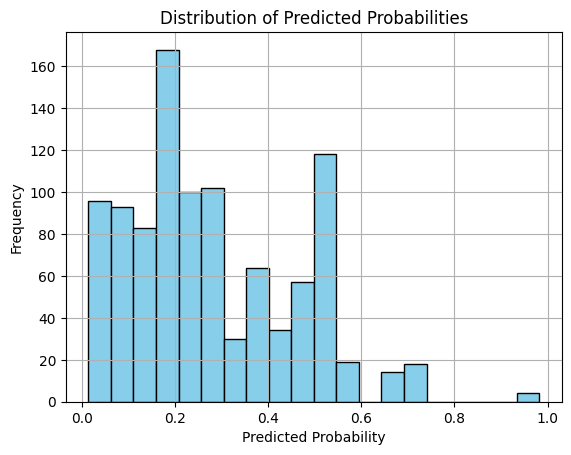

In [25]:
# How the predicted probabilities are distributed across the dataset

plt.hist(predictions_df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

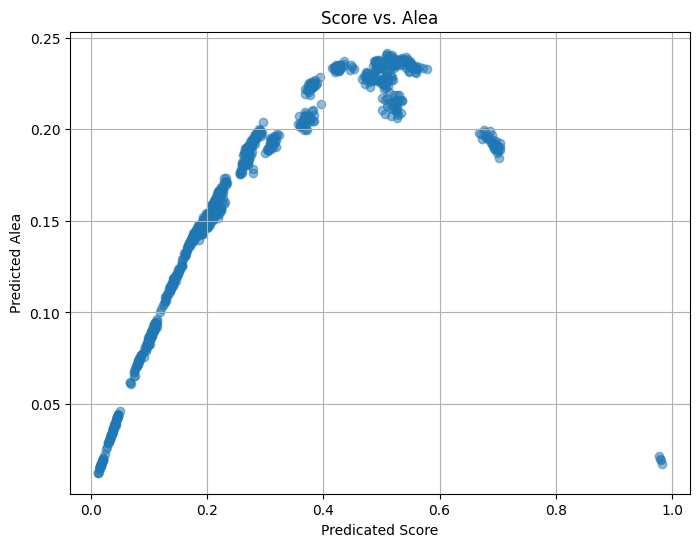

In [30]:
# analysis of  'score' and 'alea' columns
score_values = predictions_df['score']
alea_values = predictions_df['alea']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(score_values, alea_values, alpha=0.5)
plt.title('Score vs. Alea')
plt.xlabel('Predicated Score')
plt.ylabel('Predicted Alea')
plt.grid(True)
plt.show()

In [8]:
#This is the Analysis of the curated/standardized data

#  path to the CSV file using the relative path
curated_predictions_csv_file_path = os.path.join("..", "data", "curated_predictions.csv")

# Load the predictions CSV file into a DataFrame
curated_predictions_df = pd.read_csv(curated_predictions_csv_file_path)

# Display more info about the data frame to inspect the data
print(predictions_df.head())
print(predictions_df.info())


                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input     score      alea  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1  0.425770  0.232899   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1  0.414392  0.233519   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl  0.428984  0.232990   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...  0.421347  0.232110   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...  0.421505  0.232251   

       epis  
0  0.011591  
1  0.009152  
2  0.011966  
3  0.011704  
4  0.011588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     1000 non-null   object 
 1   input   1000 non-null   object 
 

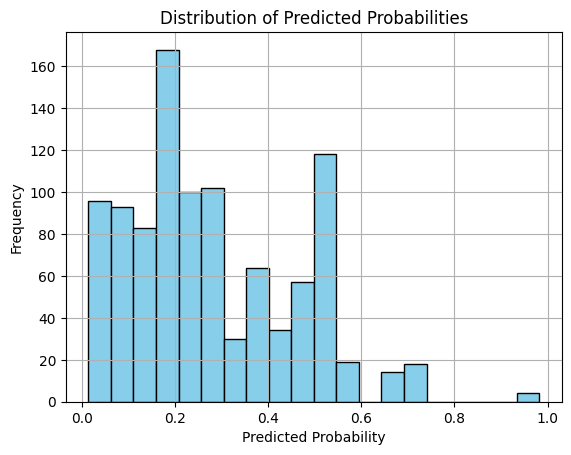

In [34]:
# how the predicted probabilities are distributed across the dataset
plt.hist(predictions_df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

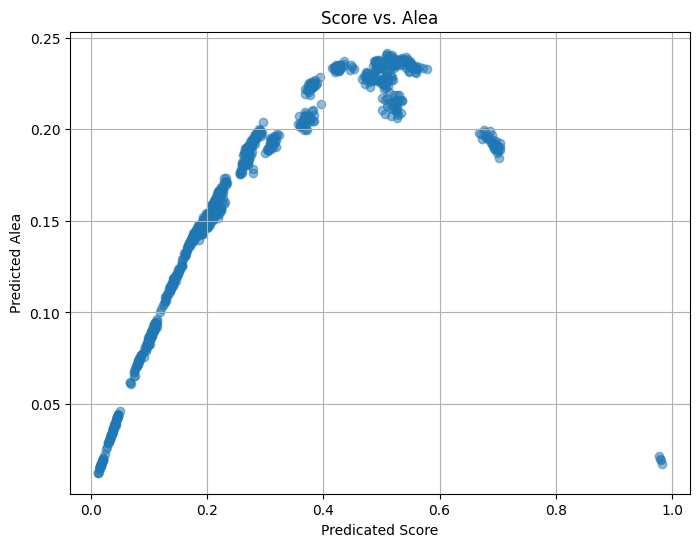

In [35]:
# Analysis of  'score' and 'alea' columns
score_values = predictions_df['score']
alea_values = predictions_df['alea']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(score_values, alea_values, alpha=0.5)
plt.title('Score vs. Alea')
plt.xlabel('Predicated Score')
plt.ylabel('Predicted Alea')
plt.grid(True)
plt.show()

In [32]:
# Calculate the mean uncertainties for different dataset sizes
dataset_sizes = ["25% of training set", "50% of training set", "100% of training set"]
epistemic_uncertainties = []
aleatoric_uncertainties = []

# Function to calculate mean uncertainties for a given percentage of dataset
def calculate_mean_uncertainties(percentage):
    num_samples = int(len(curated_predictions_df) * percentage / 100)
    subset_df = curated_predictions_df.head(num_samples)
    epistemic_mean = subset_df['epis'].mean()
    aleatoric_mean = subset_df['alea'].mean()
    return epistemic_mean, aleatoric_mean
    
# Calculate uncertainties for different dataset sizes
for percentage in [25, 50, 100]:
    epistemic_mean, aleatoric_mean = calculate_mean_uncertainties(percentage)
    epistemic_uncertainties.append(epistemic_mean)
    aleatoric_uncertainties.append(aleatoric_mean)

# Create a DataFrame for the table
uncertainty_table = pd.DataFrame({
    "Dataset size": dataset_sizes,
    "Epistemic": epistemic_uncertainties,
    "Aleatoric": aleatoric_uncertainties
})

# Display the table
print(uncertainty_table)

           Dataset size  Epistemic  Aleatoric
0   25% of training set   0.010222   0.166192
1   50% of training set   0.011503   0.164608
2  100% of training set   0.010553   0.159488


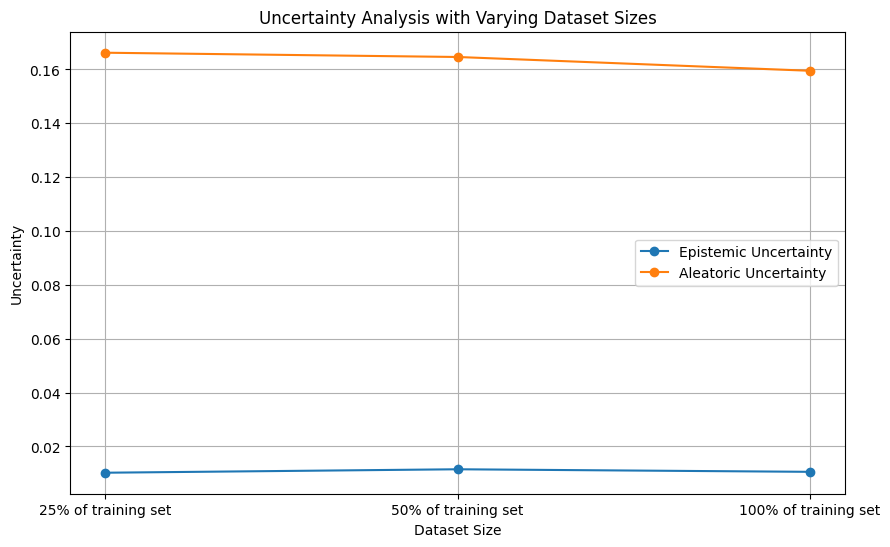

In [33]:
import matplotlib.pyplot as plt

#  figure Plotting
plt.figure(figsize=(10, 6))

# Epistemic uncertainty
plt.plot(dataset_sizes, epistemic_uncertainties, marker='o', label='Epistemic Uncertainty')

# Aleatoric uncertainty
plt.plot(dataset_sizes, aleatoric_uncertainties, marker='o', label='Aleatoric Uncertainty')

# Add labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Uncertainty')
plt.title('Uncertainty Analysis with Varying Dataset Sizes')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
## CONCLUSIONS

# THE SCATTER GRAPH

 The scatter plot provides insights into the continued reliability of the model in assigning high score values for compounds detected to exhibit inhibitor hence gives  probability of hERG channel blockade for different compounds

 The consistent aleatoric levels provide insights into the model's confidence in its predictions.
 By looking at the distribution of predicted scores and aleatoric uncertainty across  the curated and the unstandardized sets, it turns out that the score inreases as the aleatoric uncertanity in most cases


# FROM THE HISTOGRAM

 The model may be more confident in predicting compounds with lower probabilities of hERG channel blockade especially less than 0.6
 But If the goal is to prioritize compounds with a high likelihood of hERG channel blockade for further evaluation, the model's performance at higher probability thresholds may be more critical to evaluate

#TABLE

 While both uncertainties decrease with larger dataset sizes, the rate of decrease is more pronounced for the aleatoric uncertainty compared to the epistemic uncertainty.
 The relatively low values of both epistemic and aleatoric uncertainties suggest that the model is performing reasonably well across different dataset sizes.

# PLOT

 The aleatoric uncertainty is generally higher than the epistemic uncertainty across all dataset sizes

 what does this mean; High Aleatoric Uncertainty: there may be inherent challenges in predicting hERG channel blockade accurately for certain compounds
                    ; Low Epistemic Uncertainty: the BayesHERG model has been trained effectively and can provide valuable insights into the potential hERG-related safety risks.